In [46]:
%matplotlib inline
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
import seaborn as sns

In [5]:
data=pd.read_csv("Processed-nhanes3.csv")

In [6]:
data.columns

Index(['agestrat', 'sex', 'ses', 'hf', 'stroke', 'mi', 'fast', 'metabolic',
       'mortstat', 'race_hispanic', 'race_multiracial',
       'race_non hispanic black', 'race_non hispanic white'],
      dtype='object')

In [7]:
Y = data['mortstat']

In [8]:
del data['mortstat']

In [9]:
X = data

In [10]:
X.shape

(13434, 12)

In [11]:
Y = np.ravel(Y)

In [12]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.20, random_state=1)

In [13]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]

In [14]:
max_features = ['auto', 'sqrt']

In [15]:
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]

In [16]:
min_samples_split = [2, 5, 10]

In [17]:
min_samples_leaf = [1, 2, 3, 4,5]

In [18]:
bootstrap = [True, False]

In [19]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [20]:
random_grid

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 3, 4, 5],
 'bootstrap': [True, False]}

In [21]:
rf = RandomForestClassifier(random_state = 2)

In [22]:
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 100, 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

In [23]:
rf_random.fit(xtrain, ytrain)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   19.2s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.7min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=2, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 3, 4, 5], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score=True, scoring=None, verbose=2)

In [24]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 10,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 30,
 'bootstrap': True}

In [25]:
rf_best = rf_random.best_estimator_

In [26]:
rf_best.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=30, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=None,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

In [27]:
rf_best.score(xtest, ytest)

0.8429475251209527

In [28]:
ypred = rf_best.predict(xtest)

In [29]:
cm = confusion_matrix(ytest, ypred)

In [30]:
cm

array([[1837,  181],
       [ 241,  428]])

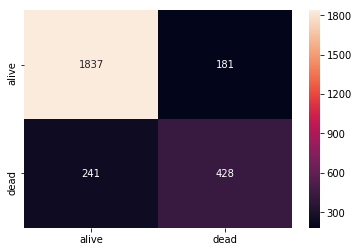

In [31]:
import seaborn as sns
labelname = rf_best.classes_
sns.heatmap(cm, annot=True,  fmt='', xticklabels=labelname, yticklabels=labelname)

In [32]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

       alive       0.88      0.91      0.90      2018
        dead       0.70      0.64      0.67       669

   micro avg       0.84      0.84      0.84      2687
   macro avg       0.79      0.78      0.78      2687
weighted avg       0.84      0.84      0.84      2687



In [33]:
np.unique(Y, return_counts=True)

(array(['alive', 'dead'], dtype=object), array([10092,  3342]))

In [34]:
rf_best.feature_importances_

array([0.74614091, 0.02208429, 0.01497401, 0.04104113, 0.03395151,
       0.0594644 , 0.01014175, 0.03117041, 0.02049239, 0.00352288,
       0.00945992, 0.00755638])

In [35]:
sorted(zip(rf_best.feature_importances_, X.columns), key=lambda x: x[0],reverse=True)

[(0.7461409103597312, 'agestrat'),
 (0.05946440385046874, 'mi'),
 (0.04104112839801326, 'hf'),
 (0.033951514733288654, 'stroke'),
 (0.031170407329569296, 'metabolic'),
 (0.022084292195245145, 'sex'),
 (0.020492392919667646, 'race_hispanic'),
 (0.01497401009305109, 'ses'),
 (0.010141753760968106, 'fast'),
 (0.009459924791399663, 'race_non hispanic black'),
 (0.007556382809088946, 'race_non hispanic white'),
 (0.0035228787595083756, 'race_multiracial')]

In [62]:
rf_best.predict_proba(xtest)

array([[0.98557722, 0.01442278],
       [0.88611904, 0.11388096],
       [0.96379347, 0.03620653],
       ...,
       [0.28591729, 0.71408271],
       [0.78281325, 0.21718675],
       [0.82452134, 0.17547866]])

In [57]:
fpr, tpr, thresholds = sklearn.metrics.roc_curve(ytest, rf_best.predict_proba(xtest)[:,1], pos_label=2)

/home/jibin/.local/lib/python3.6/site-packages/sklearn/metrics/ranking.py:656: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


In [65]:
ytest=='alive'

array([ True,  True,  True, ...,  True, False,  True])